In [46]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [47]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 30

In [48]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
         "PlantVillage",
         shuffle=True,
         image_size = (IMAGE_SIZE,IMAGE_SIZE),
         batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [49]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [50]:
len(dataset)

68

In [51]:
len(dataset)*32

2176

In [52]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 2 0 0 0 0 2 0 0 1 1]


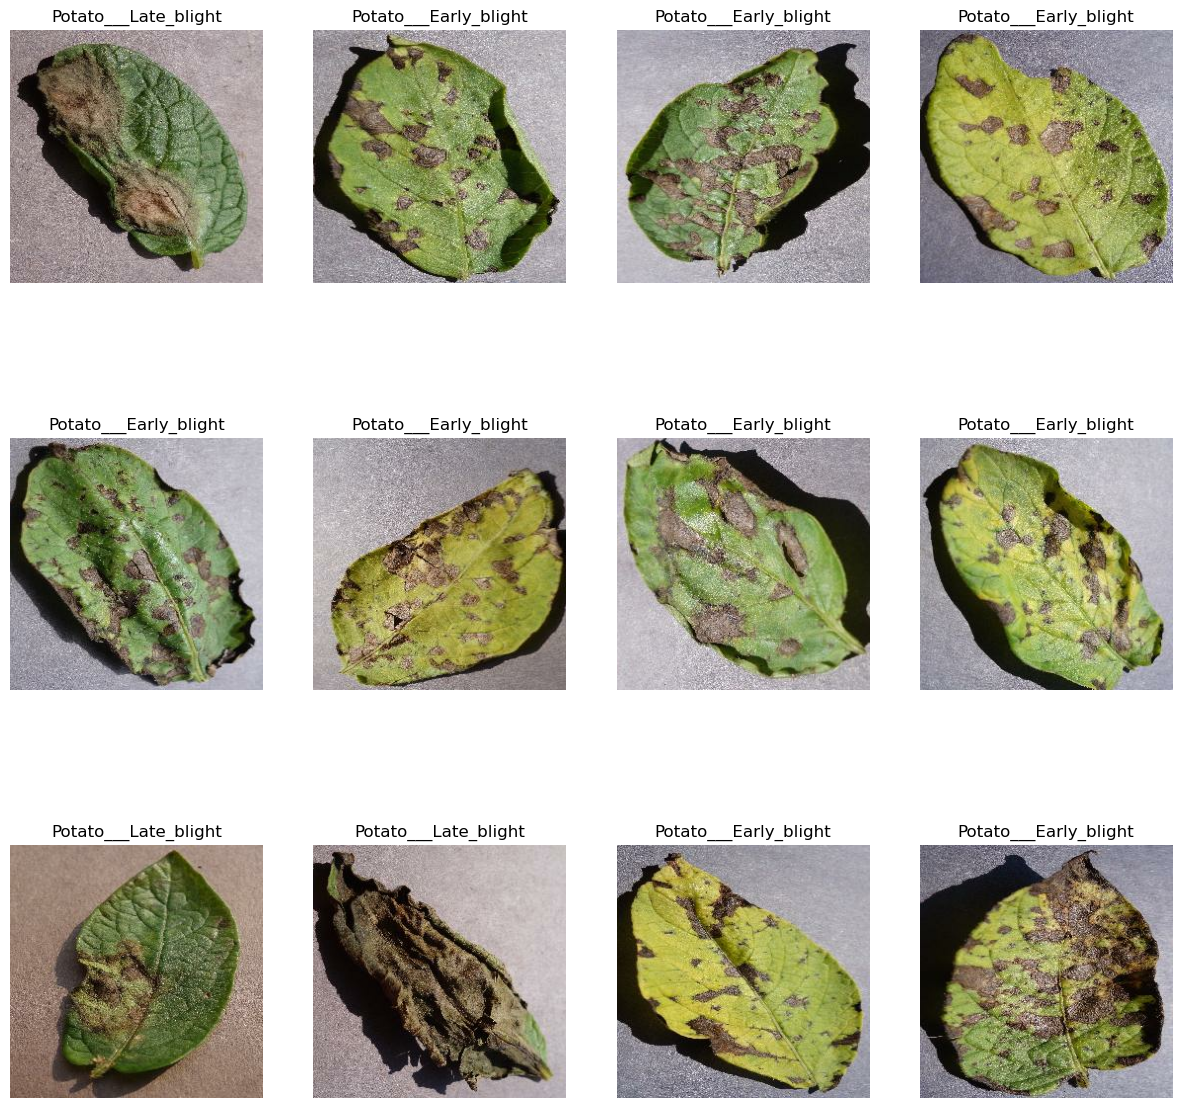

In [53]:
plt.figure(figsize=(15, 15))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [54]:
80% ==> training
20% ==> 10% validation, 10% test

SyntaxError: invalid syntax (829920516.py, line 1)

In [55]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [56]:
train_ds = dataset.take(54)
len(train_ds)

54

In [57]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [58]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [59]:
val_ds = test_ds.take(6)
len(test_ds)

14

In [60]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [61]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [62]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [63]:
len(train_ds)

54

In [64]:
len(val_ds)

6

In [65]:
len(test_ds)

8

In [66]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [67]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [68]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [37]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

model.summary()

In [71]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [73]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [74]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/30
54/54 [==============================] - 88s 2s/step - loss: 0.8961 - accuracy: 0.4722 - val_loss: 0.8123 - val_accuracy: 0.6302
Epoch 2/30
54/54 [==============================] - 75s 1s/step - loss: 0.7135 - accuracy: 0.6603 - val_loss: 0.5638 - val_accuracy: 0.7448
Epoch 3/30
54/54 [==============================] - 74s 1s/step - loss: 0.5545 - accuracy: 0.7396 - val_loss: 0.4502 - val_accuracy: 0.8021
Epoch 4/30
54/54 [==============================] - 75s 1s/step - loss: 0.3866 - accuracy: 0.8397 - val_loss: 0.3585 - val_accuracy: 0.8594
Epoch 5/30
54/54 [==============================] - 73s 1s/step - loss: 0.2914 - accuracy: 0.8837 - val_loss: 0.3760 - val_accuracy: 0.8333
Epoch 6/30
54/54 [==============================] - 73s 1s/step - loss: 0.2600 - accuracy: 0.8895 - val_loss: 0.2543 - val_accuracy: 0.9010
Epoch 7/30
54/54 [==============================] - 73s 1s/step - loss: 0.1880 - accuracy: 0.9219 - val_loss: 0.1842 - val_accuracy: 0.9115
Epoch 8/30
54/54 [==

In [75]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 5s 247ms/step - loss: 0.0809 - accuracy: 0.9648


In [76]:
scores

[0.08089760690927505, 0.96484375]

In [77]:
history

In [78]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 54}

In [79]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [80]:
history.history['accuracy']

[0.4722222089767456,
 0.6603009104728699,
 0.7395833134651184,
 0.8396990895271301,
 0.8836805820465088,
 0.8894675970077515,
 0.921875,
 0.9091435074806213,
 0.9305555820465088,
 0.9490740895271301,
 0.9438657164573669,
 0.9369212985038757,
 0.9380787014961243,
 0.9490740895271301,
 0.9548611044883728,
 0.9623842835426331,
 0.9635416865348816,
 0.9658564925193787,
 0.9461805820465088,
 0.9704861044883728,
 0.9710648059844971,
 0.9652777910232544,
 0.9832175970077515,
 0.9762731194496155,
 0.9762731194496155,
 0.9855324029922485,
 0.9942129850387573,
 0.9901620149612427,
 0.9849537014961243,
 0.9635416865348816]

In [81]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

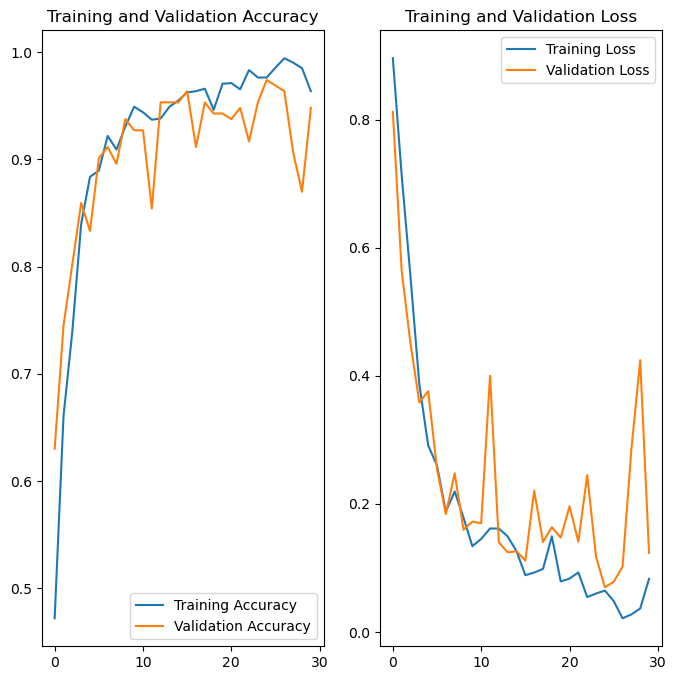

In [82]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 974ms/step
predicted label: Potato___Early_blight


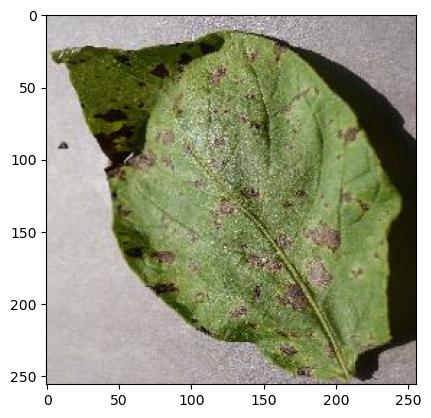

In [83]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [84]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 21ms/step


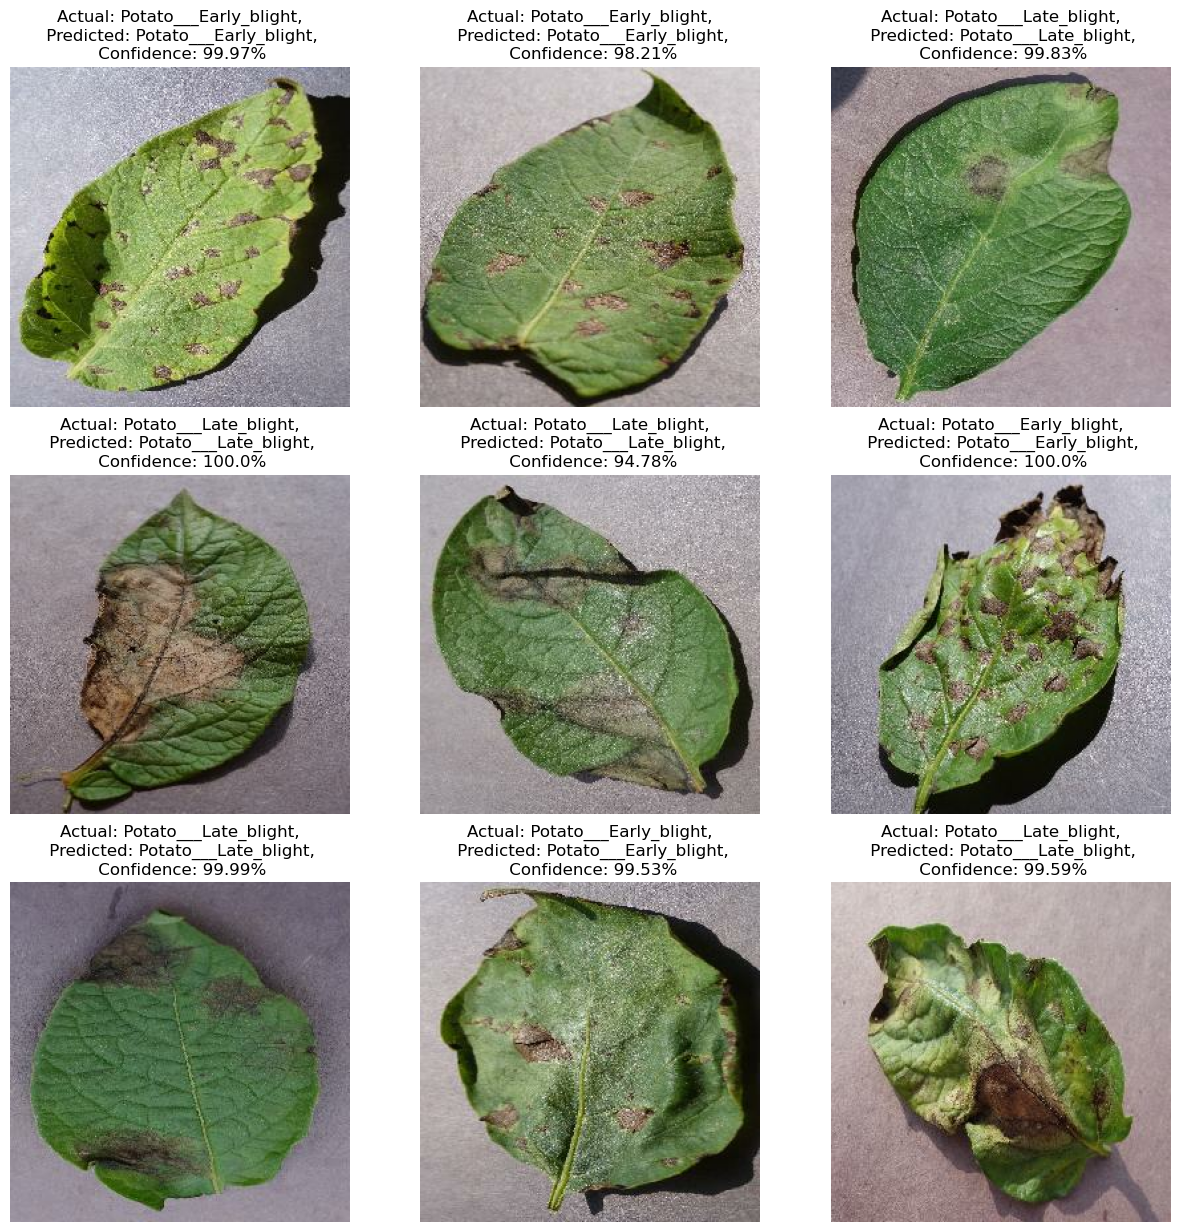

In [85]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}%")
        plt.axis("off")

In [86]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
